In [25]:
from keras.datasets import mnist;
from keras.utils import to_categorical
#wczytanie obrazów z biblioteki mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [26]:
from keras import models
from keras import layers
model = models.Sequential()
model.add( layers.Input(shape=(28,28,1)))
model.add( layers.Conv2D(32, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)) )
#model.add( layers.Conv2D(64, (3,3), activation='relu') )
#model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])


print( model.summary() )

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

None


#Zadanie nr 1
##Podzadanie nr 1

In [27]:
#nauka sieci
history = model.fit(x_train, y_train, epochs=8, batch_size=64,
validation_data=(x_test, y_test))


Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.8858 - loss: 0.3987 - val_accuracy: 0.9742 - val_loss: 0.0878
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9799 - loss: 0.0696 - val_accuracy: 0.9805 - val_loss: 0.0613
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.9865 - loss: 0.0443 - val_accuracy: 0.9836 - val_loss: 0.0517
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9853 - val_loss: 0.0464
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9866 - val_loss: 0.0438
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9841 - val_loss: 0.0496
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9849 - val_loss: 0.0518
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9973 - loss: 0.0096 - val_accu

##Podzadanie nr 2

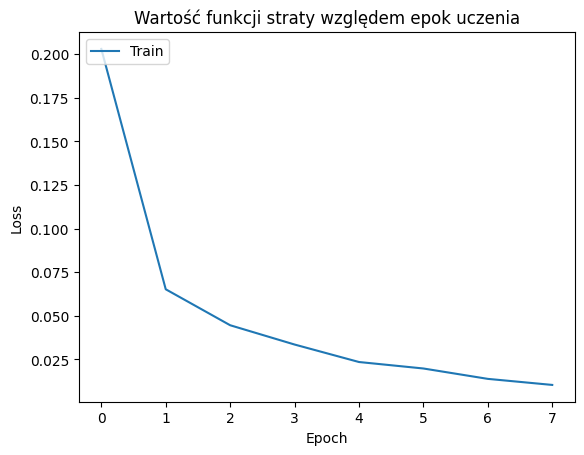

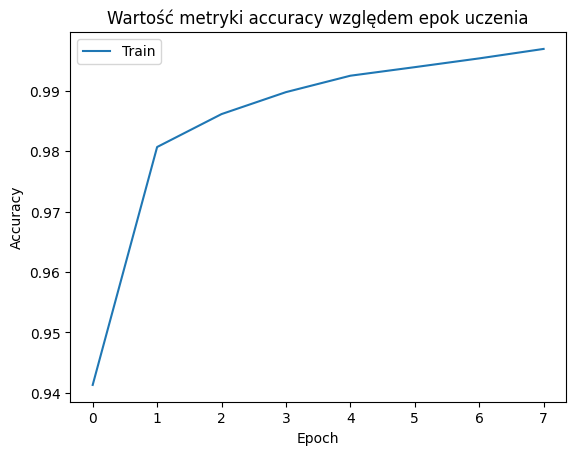

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Dla testowego zbioru:
val_loss: tf.Tensor(
[3.3378658e-06 1.1920930e-07 9.5367886e-06 ... 1.1920930e-07 2.7180087e-05
 1.1920930e-07], shape=(10000,), dtype=float32)
val_accuracy: 0.9853
conf_matrix_test [[ 972    0    2    1    0    1    2    0    1    1]
 [   0 1129    2    0    0    0    2    0    2    0]
 [   0    3 1022    0    0    0    0    5    2    0]
 [   0    0    4  996    0    7    0    1    2    0]
 [   0    0    2    0  973    0    1    0    1    5]
 [   1    0    1    6    0  882    2    0    0    0]
 [   5    2    1    1    1    3  943    0    2    0]
 [   0    2   13    0    0    0    0 1010    1    2]
 [   3    0    8    6    2    4    0    2  942    7]
 [   1    2    1    3    9    5    0    3    1  984]]
accuracy_test 0.9853
precision_test 0.9852837789421318
recall_test 0.9851824786629008
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
conf_matrix_train [[5915    0    2    0    0    0    2    0    2    2]
 [   0 6741    0    0  

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
from keras.losses import categorical_crossentropy
plt.plot(history.history['loss'])
plt.title('Wartość funkcji straty względem epok uczenia')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Wartość metryki accuracy względem epok uczenia')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

predicted_y = model.predict(x_test)
predicted_y_rounded = np.argmax(predicted_y, axis=1)
val_loss = categorical_crossentropy(y_test, predicted_y)
val_accuracy = accuracy_score(predicted_y_rounded, test_labels)
print("Dla testowego zbioru:")
print("val_loss:", val_loss)
print("val_accuracy:", val_accuracy)

#-------przygotowanie macierzy pomyłek i obliczenie metryk
# TESTOWE:
# Uzyskanie macierzy pomyłek
conf_matrix_test = confusion_matrix(test_labels, predicted_y_rounded)

# Obliczenie metryk
accuracy_test = accuracy_score(test_labels, predicted_y_rounded)
precision_test = precision_score(test_labels, predicted_y_rounded, average="macro")
recall_test = recall_score(test_labels, predicted_y_rounded, average="macro")

print("conf_matrix_test",conf_matrix_test)
print("accuracy_test",accuracy_test)
print("precision_test",precision_test)
print("recall_test",recall_test)
# TRENINGOWE:
predicted_y_train = model.predict(x_train)
predicted_y_train_rounded = np.argmax(predicted_y_train, axis=1)

# Uzyskanie macierzy pomyłek
conf_matrix_train = confusion_matrix(train_labels, predicted_y_train_rounded)

# Obliczenie metryk
accuracy_train = accuracy_score(train_labels, predicted_y_train_rounded)
precision_train = precision_score(train_labels, predicted_y_train_rounded, average="macro")
recall_train = recall_score(train_labels, predicted_y_train_rounded, average="macro")
print("conf_matrix_train",conf_matrix_train)
print("accuracy_train",accuracy_train)
print("precision_train",precision_train)
print("recall_train",recall_train)


##Podzadanie nr 3

Wyniki z laboratorium nr 7:
```

Metryki i macierz pomyłek dla zbioru treningowego:

Accuracy: 0.9544666666666667

Precision: 0.9542385739932907

Recall: 0.9542385739932907

Confusion Matrix:

 [[5812    1   12    4    1   13   31    5   41    3]

 [   1 6643   22    8    3    7    3   10   37    8]

 [  28   30 5632   64   28    8   50   31   79    8]

 [  20   23   87 5683    2  116   16   27  127   30]

 [  10   17   33    8 5553    6   67    8   39  101]

 [  31   31   15  102   13 5046   85    3   81   14]

 [  15    9    6    3   15   43 5805    3   18    1]

 [  21   19   20   23   30    5    5 6022   35   85]

 [  20   67   21   69   17   53   33    8 5549   14]

 [  22   11    6   55  108   35    7   96   86 5523]]


Metryki i macierz pomyłek dla zbioru testowego:

Accuracy: 0.9288

Precision: 0.9282213884893157

Recall: 0.9282213884893157

Confusion Matrix:

 [ 960    0    2    2    0    2    8    2    4    0]

 [   0 1110    4    2    2    2    5    0    9    1]

 [   9    9  930   15   12    7   16    8   26    0]

 [   2    4   16  920    2   26    3   10   24    3]

 [   1    2    9    7  898    4   17    7    3   34]

 [   5    3    2   24    5  810   17    1   18    7]

 [   9    4    7    1    3   10  918    2    4    0]

 [   2    9   14   14    5    2    0  947    8   27]

 [   5   13    7   14    9   14   10    9  888    5]

 [   8    6    0   11   26    8    0   25   18  907]
 ```

 ### Porównanie:
 Jak możemy zobaczyć nowy model osiąga o wiele lepsze wyniki w o wiele krótszym czasie niż porzedni. Wystarczyła bowiem tylko jedna epoka aby model nauczył się wystarczający by wartość funkcji straty spadła poniżej 0,1.
 Nowy model posiada accuracy rzędu 0.9872 w porównaniu z poprzednim wynikiem 0.9542 / 0.9288. Jest to zaprawdę dobry wynik.
  



##Podzadanie nr 4

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.8808 - loss: 0.4018 - val_accuracy: 0.9824 - val_loss: 0.0532
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9886 - val_loss: 0.0348
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9902 - val_loss: 0.0313
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9929 - loss: 0.0200 - val_accuracy: 0.9897 - val_loss: 0.0314


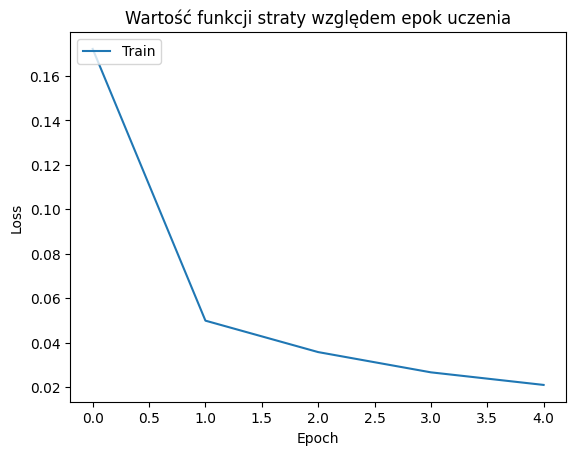

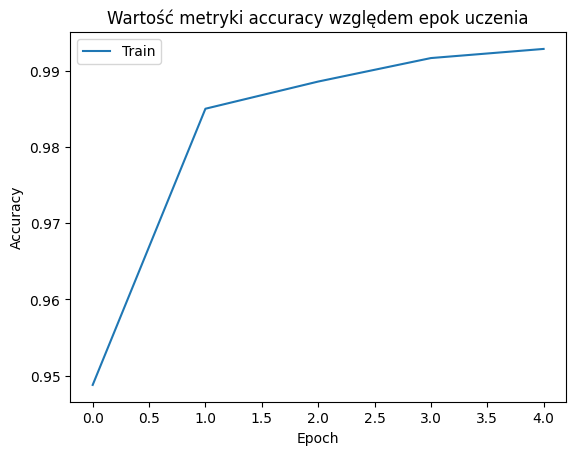

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Dla testowego zbioru:
val_loss: tf.Tensor(
[3.3378658e-06 1.1920930e-07 9.5367886e-06 ... 1.1920930e-07 2.7180087e-05
 1.1920930e-07], shape=(10000,), dtype=float32)
val_accuracy: 0.9853
conf_matrix_test [[ 972    0    2    1    0    1    2    0    1    1]
 [   0 1129    2    0    0    0    2    0    2    0]
 [   0    3 1022    0    0    0    0    5    2    0]
 [   0    0    4  996    0    7    0    1    2    0]
 [   0    0    2    0  973    0    1    0    1    5]
 [   1    0    1    6    0  882    2    0    0    0]
 [   5    2    1    1    1    3  943    0    2    0]
 [   0    2   13    0    0    0    0 1010    1    2]
 [   3    0    8    6    2    4    0    2  942    7]
 [   1    2    1    3    9    5    0    3    1  984]]
accuracy_test 0.9853
precision_test 0.9852837789421318
recall_test 0.9851824786629008
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
conf_matrix_train [[5915    0    2    0    0    0    2    0    2    2]
 [   0 6741    0    0  

In [29]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
from keras.losses import categorical_crossentropy
model2 = models.Sequential()
model2.add( layers.Input(shape=(28,28,1)))
model2.add( layers.Conv2D(32, (3,3), activation='relu') )
model2.add( layers.MaxPooling2D((2,2)) )
model2.add( layers.Conv2D(64, (3,3), activation='relu') )
model2.add( layers.MaxPooling2D((2,2)) )
model2.add( layers.Flatten() )
model2.add( layers.Dense(64,activation='relu') )
model2.add( layers.Dense(10,activation='softmax') )
model2.compile( optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

print( model2.summary() )

#nauka sieci
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=64,
validation_data=(x_test, y_test))


plt.plot(history2.history['loss'])
plt.title('Wartość funkcji straty względem epok uczenia')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history2.history['accuracy'])
plt.title('Wartość metryki accuracy względem epok uczenia')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

predicted_y2 = model.predict(x_test)
predicted_y_rounded2 = np.argmax(predicted_y2, axis=1)
val_loss2 = categorical_crossentropy(y_test, predicted_y2)
val_accuracy2 = accuracy_score(predicted_y_rounded2, test_labels)
print("Dla testowego zbioru:")
print("val_loss:", val_loss2)
print("val_accuracy:", val_accuracy2)

#-------przygotowanie macierzy pomyłek i obliczenie metryk
# TESTOWE:
# Uzyskanie macierzy pomyłek
conf_matrix_test2 = confusion_matrix(test_labels, predicted_y_rounded2)

# Obliczenie metryk
accuracy_test2 = accuracy_score(test_labels, predicted_y_rounded2)
precision_test2 = precision_score(test_labels, predicted_y_rounded2, average="macro")
recall_test2 = recall_score(test_labels, predicted_y_rounded2, average="macro")

print("conf_matrix_test",conf_matrix_test2)
print("accuracy_test",accuracy_test2)
print("precision_test",precision_test2)
print("recall_test",recall_test2)

# TRENINGOWE:
predicted_y_train2 = model.predict(x_train)
predicted_y_train_rounded2 = np.argmax(predicted_y_train2, axis=1)

# Uzyskanie macierzy pomyłek
conf_matrix_train2 = confusion_matrix(train_labels, predicted_y_train_rounded2)

# Obliczenie metryk
accuracy_train2 = accuracy_score(train_labels, predicted_y_train_rounded2)
precision_train2 = precision_score(train_labels, predicted_y_train_rounded2, average="macro")
recall_train2 = recall_score(train_labels, predicted_y_train_rounded2, average="macro")

print("conf_matrix_train",conf_matrix_train2)
print("accuracy_train",accuracy_train2)
print("precision_train",precision_train2)
print("recall_train",recall_train2)



Możemy zauważyć niewielką poprawę w dokładności klasyfikacji obrazów aczkolwiek jest ona moim zdaniem tak mała, że można by ją pominąć i stosować mniej skomplikowaną architekturę cechującą się mniejszą złożonością obliczeniową modelu, co bezpośrednio przekłada się na czas propagacji danych z wejściaa do wyjścia układu (modelu).
#Zadanie nr 2
##Podzadanie nr 1

In [30]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

##Podzadanie nr 2

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

##Podzadanie nr 3

In [32]:
print('train images size',train_images.shape)
print('test images size',test_images.shape)

train_images_norm = train_images / 256
test_images_norm = test_images / 256


train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
num_classes = 10
y_train_labels = to_categorical(train_labels, num_classes)
y_test_labels = to_categorical(test_labels, num_classes)

train images size (50000, 32, 32, 3)
test images size (10000, 32, 32, 3)


##Podzadanie nr 4


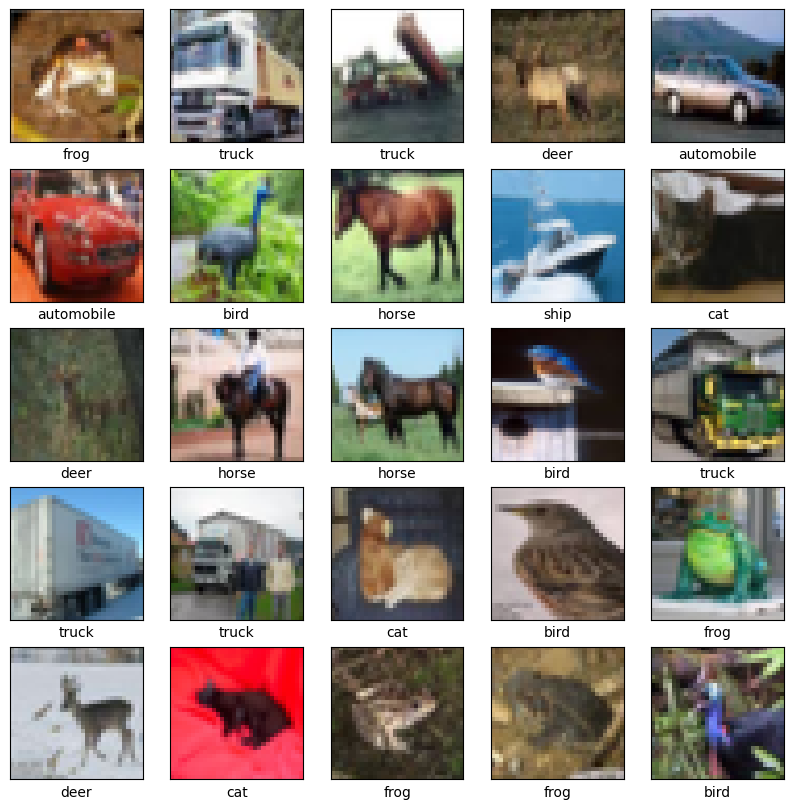

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
for i in range (25): # pierwsze 25 obrazków
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])


##Podzadanie nr 5

In [65]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

#utworzenie modelu

model3 = models.Sequential()
model3.add( layers.Input(shape=(32,32,3)))
model3.add( layers.Conv2D(32, (3,3), activation='relu') )
model3.add( layers.MaxPooling2D((2,2)) )
model3.add( layers.Conv2D(64, (3,3), activation='relu') )
model3.add( layers.MaxPooling2D((2,2)) )
model3.add( layers.Conv2D(128, (3,3), activation='relu') )
model3.add( layers.MaxPooling2D((2,2)) )
model3.add( layers.Flatten() )
model3.add( layers.Dense(64,activation='relu') )
model3.add( layers.Dense(64,activation='relu') )
model3.add( layers.Dense(64,activation='relu') )
model3.add( layers.Dense(10,activation='softmax') )
model3.compile( optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

print( model2.summary() )



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

None


##Podzadanie nr 6

Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 88ms/step - accuracy: 0.2873 - loss: 1.8905 - val_accuracy: 0.5150 - val_loss: 1.3287
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.5330 - loss: 1.2938 - val_accuracy: 0.5881 - val_loss: 1.1447
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.6083 - loss: 1.1047 - val_accuracy: 0.6373 - val_loss: 1.0351
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6589 - loss: 0.9634 - val_accuracy: 0.6677 - val_loss: 0.9606
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6937 - loss: 0.8710 - val_accuracy: 0.6830 - val_loss: 0.9225
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7211 - loss: 0.7988 - val_accuracy: 0.6883 - val_loss: 0.8998
Epoch 7/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7450 - loss: 0.7324 - val_accuracy: 0.6871 - val_loss: 0.9116
Epoch 8/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7621 - loss: 0.6801 - val_accu

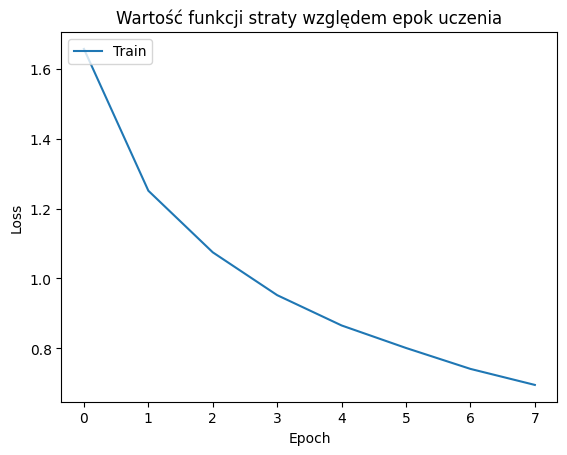

Accuracy: 0.7571399807929993


In [66]:

history3 = model3.fit(train_images_norm, y_train_labels, epochs=8, batch_size=64,
validation_data=(test_images_norm, y_test_labels))

plt.plot(history3.history['loss'])
plt.title('Wartość funkcji straty względem epok uczenia')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
print("Accuracy:", history3.history['accuracy'][-1])



##Podzadanie nr 7

In [69]:
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
def metrics(y_pred, _y,label):
  # Zaokrąglenie wyników przewidywań
  y_pred_rounded = np.argmax(y_pred, axis=1)
  # obliczanie wartości funkcji straty

  # Obliczenie metryk
  accuracy = accuracy_score(_y, y_pred_rounded)
  precision = precision_score(_y, y_pred_rounded, average="macro")
  recall = recall_score(_y, y_pred_rounded, average="macro")
  # Uzyskanie macierzy pomyłek
  conf_matrix = confusion_matrix(_y, y_pred_rounded)
  # Wyświetlanie wyników
  print(label)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", precision)
  print("Confusion Matrix:\n", conf_matrix)
def countMistakes(y_pred, _y):
  mistakes = 0
  for i in range(len(_y)):
    if(y_pred[i] != _y[i]):
      mistakes += 1
  return mistakes
# zbiór treningowy:
train_y_pred = model3.predict(train_images_norm)
loss = categorical_crossentropy(y_train_labels,train_y_pred)
loss = sum(loss) / len(loss)
print("loss:",loss)
metrics(train_y_pred,train_labels, "Wartości średniej funkcji straty oraz metryk dla zbioru treningowego")
print("Liczba błędów: ", countMistakes(np.argmax(train_y_pred,axis=1), train_labels), "z", len(train_labels), " wszystkich próbek." )
# zbiór testowy:
test_y_pred = model3.predict(test_images_norm)
loss = categorical_crossentropy(y_test_labels,test_y_pred)
loss = sum(loss) / len(loss)
print("loss:",loss)
metrics(test_y_pred,test_labels, "Wartości średniej funkcji straty oraz metryk dla zbioru testowego")
print("Liczba błędów: ", countMistakes(np.argmax(test_y_pred, axis=1), test_labels), "z", len(test_labels), " wszystkich próbek." )

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step
loss: tf.Tensor(0.6669084, shape=(), dtype=float32)
Wartości funkcji straty oraz metryk dla zbioru treningowego
Accuracy: 0.76672
Precision: 0.7799227254803096
Recall: 0.7799227254803096
Confusion Matrix:
 [[4106  134  338   95   66   37   54   29  114   27]
 [  33 4686   43   24    4   25   76   16   35   58]
 [ 199   22 3676  176  251  233  386   23   27    7]
 [  71   10  391 2659  164 1085  549   46   24    1]
 [  56    4  483  210 3635  164  360   74   10    4]
 [  15    9  247  512  186 3770  175   72   11    3]
 [   9   13  165  109   65   91 4531    5    9    3]
 [  19   14  243  188  549  418   41 3518    7    3]
 [ 316  235  113  100   24   42   52    6 4069   43]
 [ 153  573   75  139   21   89  145   55   64 3686]]
Liczba błędów:  11664 z 50000  wszystkich próbek.
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
loss: tf.Tensor(0.9038903, shape=(), dtype=float32)
Wartości funkcji straty oraz metryk dla zbioru testowego
Accuracy: 0.689
P

##Podzadanie nr 8

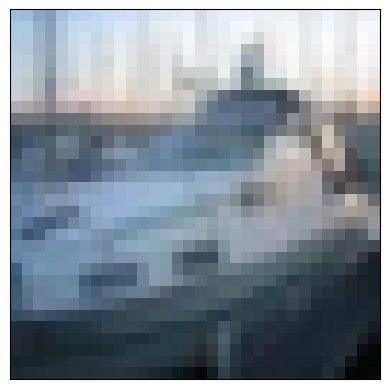

Sklasyfikowano jako: automobile
Poprawna klasyfikacja: ship


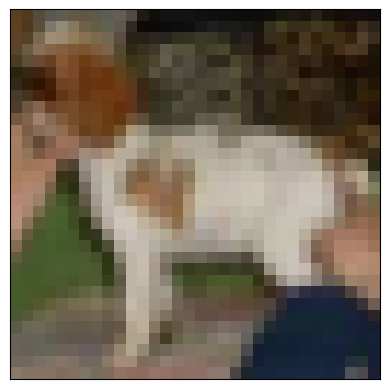

Sklasyfikowano jako: deer
Poprawna klasyfikacja: dog


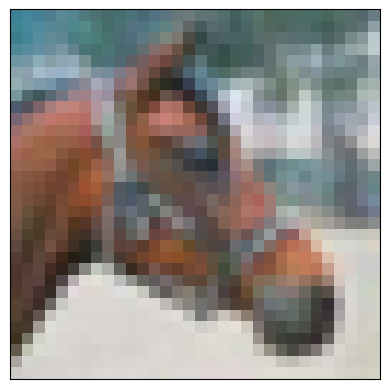

Sklasyfikowano jako: cat
Poprawna klasyfikacja: horse


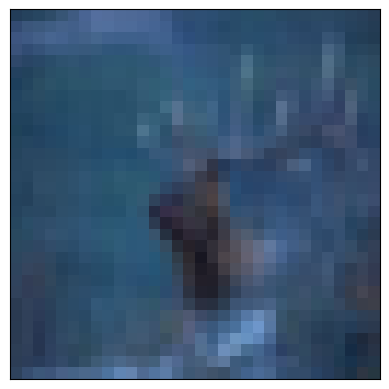

Sklasyfikowano jako: airplane
Poprawna klasyfikacja: deer


In [70]:
import numpy as np
badIndexes = []
test_y_pred_rounded = np.argmax(test_y_pred, axis=1)
# wyznaczenie indeksów źle sklasyfikowanych obrazów
for i in range(len(test_labels)):
  if(test_y_pred_rounded[i] != test_labels[i]):
    badIndexes.append(i)

len_badIndexes = len(badIndexes)
# wyswietlenie 4 obrazków źle sklasyfikowanych
for i in range(4):
  if i < len_badIndexes:
    ind = badIndexes[i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[ind], cmap=plt.cm.binary)
    plt.show()
    print("Sklasyfikowano jako:",class_names[test_y_pred_rounded[ind]])
    print("Poprawna klasyfikacja:",class_names[test_labels[ind]])
